Aulas 2 e 3 - Coleta, Organização, Limpeza e Imputação de Dados
===============================================================

Professor: Marcos Cesar Gritti  
Email: cesargritti@gmail.com

Antes de começar:
 - Caso seu ambiente Anaconda não possua uma das dependências necessárias para a execução do código contigo neste notebook, abra uma célula e execute o comando: ```!pip install -r ../requirements.txt```

Neste módulo vamos aprender sobre:
 1. **Como carregar dados de diferentes formatos em memória no nosso ambiente de desenvolvimento;**
 2. **Análise Exploratória;**
 3. **Tratamento de Dados;**
 4. **Imputação de dados;**
 5. **Normalização e estandardização de variáveis contínuas;**

1 - Carregando dados no ambiente de desenvolvimento
=============================================

No dia a dia de trabalho, um **Cientista de Dados** se depara com diferentes tipos fontes de dados. Nem sempre, em sua equipe, haverá um **Engenheiro de Dados** disponível para te ajudar a coletar dados de interesse em um formato fácil de integração com seu ambiente de desenvolvimento Python (ou qualquer outro ambiente de desenvolvimento científico), no nosso caso, o Jupyter Notebook. Portanto, é fundamental que você domine os principais formatos e/ou fontes existentes no mercado, para que não dependa de um terceiro para uma rápida prototipação/experimentação.

As principais fontes de dados, encontradas por um profissional da área, são:
 - Arquivos .csv;
 - Arquivos .json;
 - Arquivos .parquet;
 - Base de dados relacional SQL;
 - Base de dados não relacional NoSQL;

Em empresas que seguem a filosofia **Data Driven** haverá, usualmente, uma pedaço de Software chamado de *Camada de Ingestão de Dados*. Esta camada, desenvolvida por **Engenheiros de Dados**, tem por objetivo centralizar diversas fontes de informação bruta (arquivos csv, json, parquet, imagens, audios, etc ...) em um único repositório (ou **Buckets**). Este repositório centralizado recebe o nome de **Data Lake**, e é o ponto de partida para processos de ETL (*Extract, Transform and Load*), e também a forma mais fácil de um **Cientista de Dados** se servir de dados.

A consulta à base de dados SQL/NoSQL está fora do escopo deste módulo, contudo, com o domínio da linguagem Python para o processamento dos principais tipos de arquivo citados acima, . Tampouco trabalharemos, neste módulo, com processamento de imagens/audio.

1.1 - Arquivo .csv
----------------------

A existência de arquivos *csv* em **Data Lakes** não é predominante, pois, apesar de ser um arquivo fácil de se manipular, não é o mais eficiente (redução de espaço em disco e otimização de tempo de leitura). Entretanto, é o tipo de arquivo mais encontrado quando a informação ainda não está disponível no **Data Lake** (exportação de planilhas Excel, base de dados do IBGE, entre outras).

O arquivo csv é o melhor amigo do Pandas. Para carregar um arquivo em memória, utilizamos a função `read_csv`

```
dataset = pd.read_csv("caminho/do/arquivo.csv")
```

In [1]:
import pandas as pd

dados_csv = pd.read_csv("dados_brutos.csv")
dados_csv.head()

,uf,tipo,cod_localidade,feat_1,feat_2,feat_3,feat_4,loc_x,loc_y,mercado_mais_proximo,farmacia_mais_proxima,escola_mais_proxima,num_penit_4km,num_penit_500m,idade_imovel,area,preco
0,RJ,Tipo 1,Localidade 4,0.620648,9.967806,4.990882,25.124844,0.081382,0.727021,3603.941384,2002.686030,1124.043113,0.0,0.0,NaN,123.0,1348017
1,SP,Tipo 2,Localidade 4,0.817642,12.629695,5.466835,23.444343,0.367980,0.145812,2185.209139,683.811862,2462.825432,0.0,0.0,13.0,143.0,926601
2,RJ,Tipo 2,Localidade 3,0.793080,11.292156,4.201919,28.230731,0.332654,0.432904,1025.698339,957.451552,1049.112117,0.0,0.0,12.0,150.0,1627474
3,SC,Tipo 1,Localidade 4,0.792435,11.563047,5.459777,22.414837,0.159663,0.884596,NaN,3723.067390,1296.121182,0.0,0.0,8.0,160.0,1201041
4,RN,Tipo 1,Localidade 3,0.711696,11.655785,4.891314,25.451251,0.156154,0.836320,3925.306331,705.807343,4178.062758,0.0,0.0,12.0,134.0,1444848


1.2 - Arquivo .json
------------------------

É o formato mais utilizado por **Engenheiros de Software**, devido à sua compatibilidade com as tecnologias de desenvolvimento de APIs da atualidade. Consequentemente, a quantidade de arquivos *json* em **Data Lakes** é volumosa.

No *Pandas*, importa-se um arquivo *json* utilizando o comando `read_json`

In [2]:
dados_json = pd.read_json("dados_brutos.json")
dados_json.head()

,uf,tipo,cod_localidade,feat_1,feat_2,feat_3,feat_4,loc_x,loc_y,mercado_mais_proximo,farmacia_mais_proxima,escola_mais_proxima,num_penit_4km,num_penit_500m,idade_imovel,area,preco
700,ES,Tipo 1,None,0.638824,10.158127,4.874347,26.151255,0.632733,0.481356,341.680530,3456.862812,2557.124996,0.0,0.0,37.0,NaN,1329074
701,SP,Tipo 2,Localidade 4,0.794100,11.467263,4.889458,25.737262,0.290362,0.649488,3121.658324,2711.257761,2635.042549,0.0,0.0,4.0,151.0,980660
702,MS,Tipo 1,Localidade 4,0.745027,11.088365,4.644014,26.165747,0.117298,0.131615,1808.463617,1178.930223,1231.387072,0.0,NaN,15.0,170.0,1044861
703,PR,Tipo 1,Localidade 1,0.773947,12.182951,5.778339,21.948647,0.521053,0.021927,4189.517081,6402.599591,1738.502238,0.0,0.0,8.0,84.0,1347838
704,RO,Tipo 2,Localidade 1,0.686853,10.321383,4.589251,27.254870,0.985792,0.744716,385.176751,1630.761705,3446.457453,0.0,0.0,20.0,168.0,751177


1.3 - Arquivo .parquet
-------------------------------

É um formato de armazenamento colunar, disponível em todos os projetos do ecossistema *Hadoop*.
Em suma, um arquivo *parquet* permite armazenar e consultar o arquivo de forma eficiênte, o que justifica seu emprego na construção de **Data Lakes**.

https://parquet.apache.org/

A API do *Pandas* é intuitiva! Para carregar um arquivo *parquet*, utilizamos o método `pd.read_parquet` 

In [3]:
dados_parquet = pd.read_parquet("dados_brutos.parquet")
dados_parquet.head()

,uf,tipo,cod_localidade,feat_1,feat_2,feat_3,feat_4,loc_x,loc_y,mercado_mais_proximo,farmacia_mais_proxima,escola_mais_proxima,num_penit_4km,num_penit_500m,idade_imovel,area,preco
0,DF,Tipo 1,Localidade 1,0.865418,12.469136,4.428843,28.599545,0.039081,0.967402,6424.017248,2312.613264,922.096367,0.0,0.0,9.0,60.0,1283960
1,SC,Tipo 1,Localidade 2,0.794821,11.643225,5.745631,20.793361,0.163092,0.150923,1390.553671,7062.080907,6311.945099,0.0,0.0,6.0,135.0,691992
2,MG,Tipo 2,Localidade 1,0.765382,11.246786,4.435433,27.697589,0.519452,0.083601,NaN,5795.794123,1406.914318,0.0,0.0,17.0,162.0,1042605
3,SP,Tipo 2,Localidade 1,0.742807,10.807940,4.510181,28.549110,0.094447,0.229071,2811.748941,5112.857979,1954.494335,1.0,0.0,3.0,105.0,1132298
4,DF,Tipo 1,Localidade 4,0.708509,10.182098,5.581803,22.486957,0.398567,0.594843,3362.149025,1685.887551,1600.735664,0.0,0.0,5.0,137.0,1133084


1.4 - Exercício
---------------

Os dados da aula de hoje foram divididos em três arquivos, os quais carregamos nas células anteriores. Pesquise na documentação do *Pandas* como unir as linhas dos *dataframes* `dados_csv`, `dados_json` e `dados_parquet`, e um novo *dataframe* nominado `dados`.

https://pandas.pydata.org/docs/reference/index.html#api

Dica: **Concatenar** é a palavra chave de pesquisa

In [4]:
# Substitua a igualdade abaixo por uma que empilhe as linhas dos três conjuntos de 
# dados que carregamos anteriormente em apenas um conjunto de dados denominado `dados`
dados = dados_csv.copy()

2 - Análise exploratória
===================

Agora que carregamos os dados no *notebook*, precisamos explorá-los para encontrar eventuais inconsistências.
No dia a dia de trabalho de um *Cientista de Dados*, é muito comum encontrar:
 - Campos nulos (NaN);
 - Variáveis nominais não padronizadas (ex: "MAÇA", "maça", "MACA", "Maca ");
 - Variáveis contínuas (intervalar ou de razão) fora de escala;
 - Preenchimento incorreto de campos (ex: Espera-se nome da fruta, mas campo foi preenchido com o nome da cor);
 
Dentre as etapas do processo de **Mineração de Dados**, a *limpeza* do conjunto de dados é a que despende maior tempo, e que tem papel chave quanto ao sucesso do projeto. Por quê? Como veremos adiante, alguns algoritmos de *Aprendizado de Máquina* são gulosos, ou seja, encontrarão uma resposta até mesmo para os ruídos presentes no seu conjunto de treinamento (conceito de *Overfitting*).

Vamos começar identificando que variáveis existem no conjunto, e seus respectivos tipos, utilizando os comandos:
  - `dtypes`: para verificar o tipo de cada coluna;
  - `sample(N)`: para coletar uma pequena amostra que pode nos ajudar a sanar dúvidas sobre os tipos;

In [5]:
dados.dtypes

uf                        object
tipo                      object
cod_localidade            object
feat_1                   float64
feat_2                   float64
feat_3                   float64
feat_4                   float64
loc_x                    float64
loc_y                    float64
mercado_mais_proximo     float64
farmacia_mais_proxima    float64
escola_mais_proxima      float64
num_penit_4km            float64
num_penit_500m           float64
idade_imovel             float64
area                     float64
preco                      int64
dtype: object

In [6]:
dados.sample(5).T

,501,386,188,683,346
uf,SP,SP,MG,CE,PR
tipo,Tipo 2,Tipo 2,Tipo 1,Tipo 1,Tipo 2
cod_localidade,Localidade 3,Localidade 4,Tipo 3,Localidade 2,Localidade 2
feat_1,0.823892,0.856929,0.686693,0.670836,0.740277
feat_2,12.315019,12.852133,11.275284,10.03654,9.917297
feat_3,5.570409,4.482889,4.334357,3.30722,5.700754
feat_4,21.939211,27.540537,28.721256,32.115371,21.560173
loc_x,0.448969,0.181829,0.082609,0.996785,0.326823
loc_y,0.103097,0.079253,0.681689,0.974897,0.991516
mercado_mais_proximo,1835.584188,2599.027036,3456.289352,3552.91416,6259.668243


Nosso conjunto de dados representa uma base imobiliária, e é formado pelas seguintes colunas:

| Nome                  | Descrição                                                             | Tipo               |
| ------------------    | ------------------------------------------------------                | ------------------ |
| uf                    | O estado onde o imóvel está localizado                                | object (string)    |
| tipo                  | O tipo do imóvel                                                      | object (string)    |
| cod_localidade        | Código qualitativo da localidade do imóvel (Consultoria)              | object (string)    |
| feat_1                | Feature 1 (Consultoria)                                               | float64            |
| feat_2                | Feature 2 (Consultoria)                                               | float64            |
| feat_3                | Feature 3 (Consultoria)                                               | float64            |
| feat_4                | Feature 4 (Consultoria)                                               | float64            |
| loc_x                 | Coordenada x do imóvel em um mapa local de referência (Consultoria)   | float64            |
| loc_y                 | Coordenada y do imóvel em um mapa local de referência (Consultoria)   | float64            |
| mercado_mais_proximo  | Distância do mercado mais próximo, em metros                          | float64            |
| farmacia_mais_proxima | Distância da farmácia mais próxima, em metros                         | float64            |
| escola_mais_proxima   | Distância da escola mais próxima, em metros                           | float64            |
| num_penit_4km         | Número de penitenciárias em um raio de 4km do imóvel                  | int64              |
| num_penit_500m        | Número de penitenciárias em um raio de 500m do imóvel                 | int64              |
| idade_imovel          | Idade do imóvel                                                       | int64              |
| area                  | Área do imóvel, em $m^2$                                              | float64            |
| preco                 | O preço do imóvel, em R$                                              | int64              |

* O tipo `int64`, no *Python*, representa o conjunto dos números naturais $\mathbb{N}$
* O tipo `float64`, no *Python*, representa o conjunto dos números reais $\mathbb{R}$
* O tipo `object`, no *Python*, pode representar uma **string** ou uma estrutura de dados composta (`list`, `dict`, classes customizadas, entre outras)

As variáveis `cod_localidade`, `feat_1`, `feat_2`, `feat_3`, `feat_4`, `loc_x` e `loc_y` foram elaboradas por um time de consultoria externa especializada em avaliação imobiliária. Sabemos que os códigos de qualidade contidos na coluna `cod_localidade` são utilizados para segmentar subregiões em níveis de qualidade, contudo, não sabemos se as categorias podem ser interpretadas como variáveis ordinais. Quanto às variáveis numéricas intervalares (`feat_1` à `feat_4`), sabe-se apenas que foram construídas com base em laudos históricos de avaliação de imóveis próximos, e com base em indicadores macro-econômicos.

Não existe uma receita de bolo exata para tratamento de dados, uma vez que a natureza e as regras de negócio variam muito de problema à problema. Para este caso de estudo, vamos começar verificando o conteúdo das variáveis de tipo `object` (assumindo como premissa de que são categoricas). Como já sabemos que estes campos estão armazenando valores do tipo `string`, uma boa pergunta inicial seria: Quais os possíveis valores destes campo?

Para responder a esta pergunta, podemos utilizar a função `unique`:

In [7]:
# Valores únicos de UF (incluíndo valores nulos, i.e., NaN)
dados.uf.unique()

array(['RJ', 'SP', 'SC', 'RN', 'CE', 'MG', 'ES', 'RO', 'DF', 'MS', 'PR',
       'GO', 'AC', 'BA', 'MT', 'AL', 'RS', 'PB', 'TO', 'AM', 'AP', 'SE',
       'RR', 'PI', 'MA', 'PE', 'PA', nan], dtype=object)

In [8]:
# Valores únicos de tipo
dados.tipo.unique()

array(['Tipo 1', 'Tipo 2', 'TIPO 1', 'tipo 2', nan, 'TIPO 2',
       'LOCALIDADE 6', 'Localidade 9', 'Localidade 8', 'tipo 1',
       'Localidade 6', 'Tipo 3', 'Tipo 4'], dtype=object)

In [9]:
# Valores únicos de localidade
dados.cod_localidade.unique()

array(['Localidade 4', 'Localidade 3', 'localidade 4', 'Localidade 2',
       'Localidade 9', 'Localidade 1', 'Localidade 7', 'localidade 3',
       'LOCALIDADE 2', 'localidade 1', 'LOCALIDADE 1', nan,
       'Localidade 8', 'Tipo 3', 'localidade 2', 'LOCALIDADE 3',
       'localidade 9', 'LOCALIDADE 4', 'Tipo 2', 'Localidade 5',
       'Localidade 6'], dtype=object)

In [10]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
feat_1,699.0,7.545469e-01,0.106668,0.325364,0.685488,0.760771,8.246203e-01,1.277357e+00
feat_2,697.0,1.134303e+01,1.691524,5.547180,10.270791,11.369067,1.243811e+01,1.870217e+01
feat_3,695.0,5.004631e+00,0.535787,3.214858,4.640397,5.019341,5.360686e+00,6.638993e+00
feat_4,699.0,2.498112e+01,2.727310,15.850045,23.195479,24.891645,2.681405e+01,3.349520e+01
loc_x,695.0,5.078719e-01,0.291364,0.000530,0.237618,0.512296,7.537096e-01,9.983200e-01
loc_y,699.0,5.023729e-01,0.286837,0.000887,0.250464,0.520174,7.455643e-01,9.981711e-01
mercado_mais_proximo,677.0,3.045269e+03,1725.739861,37.932408,1805.166565,2778.014697,4.011654e+03,9.733443e+03
farmacia_mais_proxima,682.0,2.776508e+03,1550.371669,186.963389,1539.632049,2552.615747,3.739683e+03,8.063493e+03
escola_mais_proxima,672.0,2.410106e+03,1348.237774,90.897824,1404.593055,2196.265701,3.241815e+03,7.336996e+03
num_penit_4km,696.0,2.988506e-01,0.467411,0.000000,0.000000,0.000000,1.000000e+00,2.000000e+00


**O que é quantil/percentil/quartil?**

Quantils são pontos estabelecidos em intervalos regulares em uma lista ordenada que informa o percentual de dados abaixo de um limiar em uma amostra.

Exemplo de cálculo de quantil:

Dada uma lista de valores desordenados $[5, 3, 1, 10, 4]$ o quantil nos diz o número índice da lista no qual $x$% da população (elementos da lista) são menores do que o valor apontado pelo índice. Por exemplo, se ordenarmos a lista de forma crescente, obtemos $[1, 3, 4, 5, 10]$.

Para calcular o quantil 0.5 (equivalente a mediana, e também ao segundo quartil), basta encontrar o índice central da lista. Nesta caso, a lista contém 5 elementos, sendo o índice 3 seu elemento central. Logo, nosso $q_{0.5} = 4$, significando que 50% dos dados de nossa amostra são menores que 4.

Equivalências:

| Quantil | Quartil | Percentil |
| ------- | ------- | --------- |
| 0.25    | 1       | 25%       |
| 0.5     | 2       | 50%       |
| 0.75    | 3       | 75%       |

A combinação de quantils com outras propriedades de uma amostra (como a média, valor mínimo, máximo e variância) nos fornece uma visão precisa da distribuição dos dados sob observação. Com o auxílio da biblioteca `seaborn`, podemos criar representação pictóricas destas informações, como no caso do Diagrama de Caixas (`boxplot`) e o Diagrama Violino (`violinplot`) apresentado abaixo: 


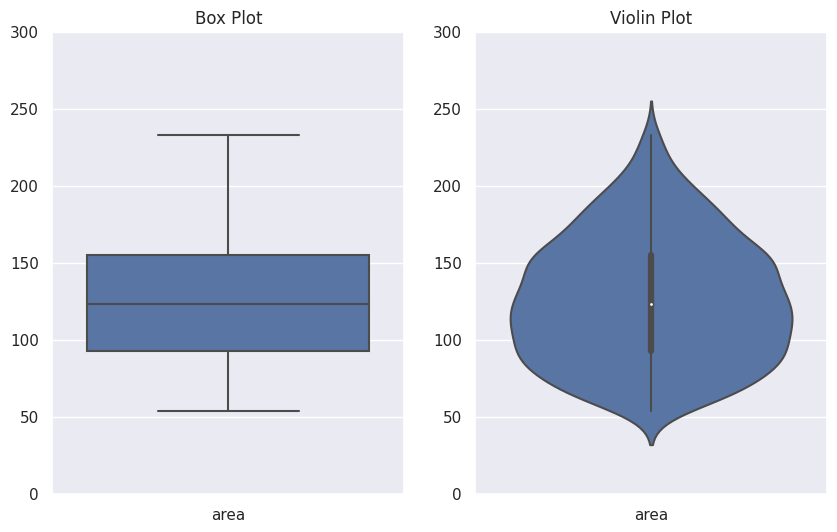

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ajustando o tamanho padrão das imagens e fontes
sns.set(font_scale=1.0, rc={
    "figure.figsize": (10, 6),
})

ax = plt.subplot(121)
sns.boxplot(data=dados[["area"]], ax=ax)
plt.title("Box Plot"); plt.ylim([0, 300]);

ax = plt.subplot(122)
sns.violinplot(data=dados[["area"]], ax=ax)
plt.title("Violin Plot"); plt.ylim([0, 300]);

Podemos utilizar o argumento `hue` do `seaborn` para segmentar visualizações por categorias distintas com o emprego de cores.

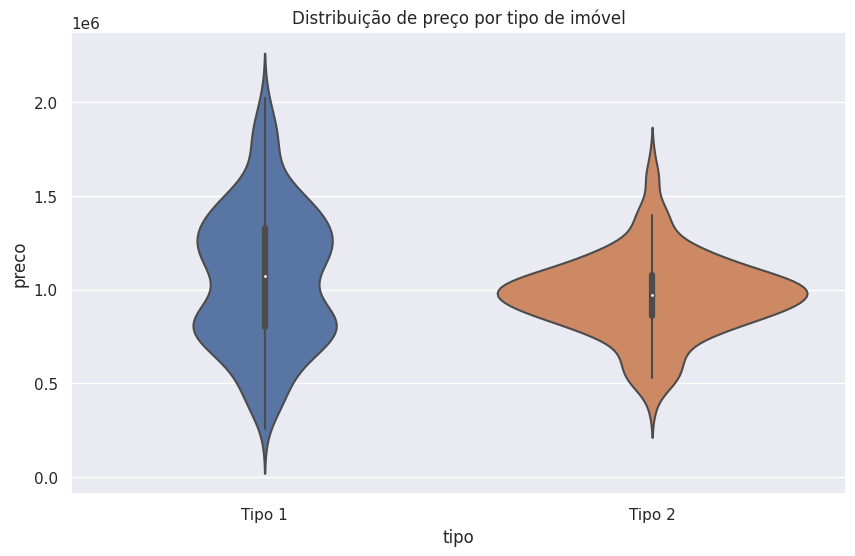

In [12]:
fig, ax = plt.subplots()
sns.violinplot(
    data=dados[dados.tipo.isin(["Tipo 1", "Tipo 2"])][["preco", "tipo"]], 
    y="preco", 
    x="tipo", 
    ax=ax
)
plt.title("Distribuição de preço por tipo de imóvel");

Além da distribuição das variáveis do nosso conjunto de dados (Análise Descritiva Univariada), podemos explorar relações entre pares utilizando a visualização `pairplot` do `seaborn` (Análise Descritiva Multivariada), que combina Funções de Densidade de Probabilidade (FDP, em inglês, *Probability Density Function*) com Gráficos de Disperção (`scatterplot`), como demonstrado na célula a seguir.

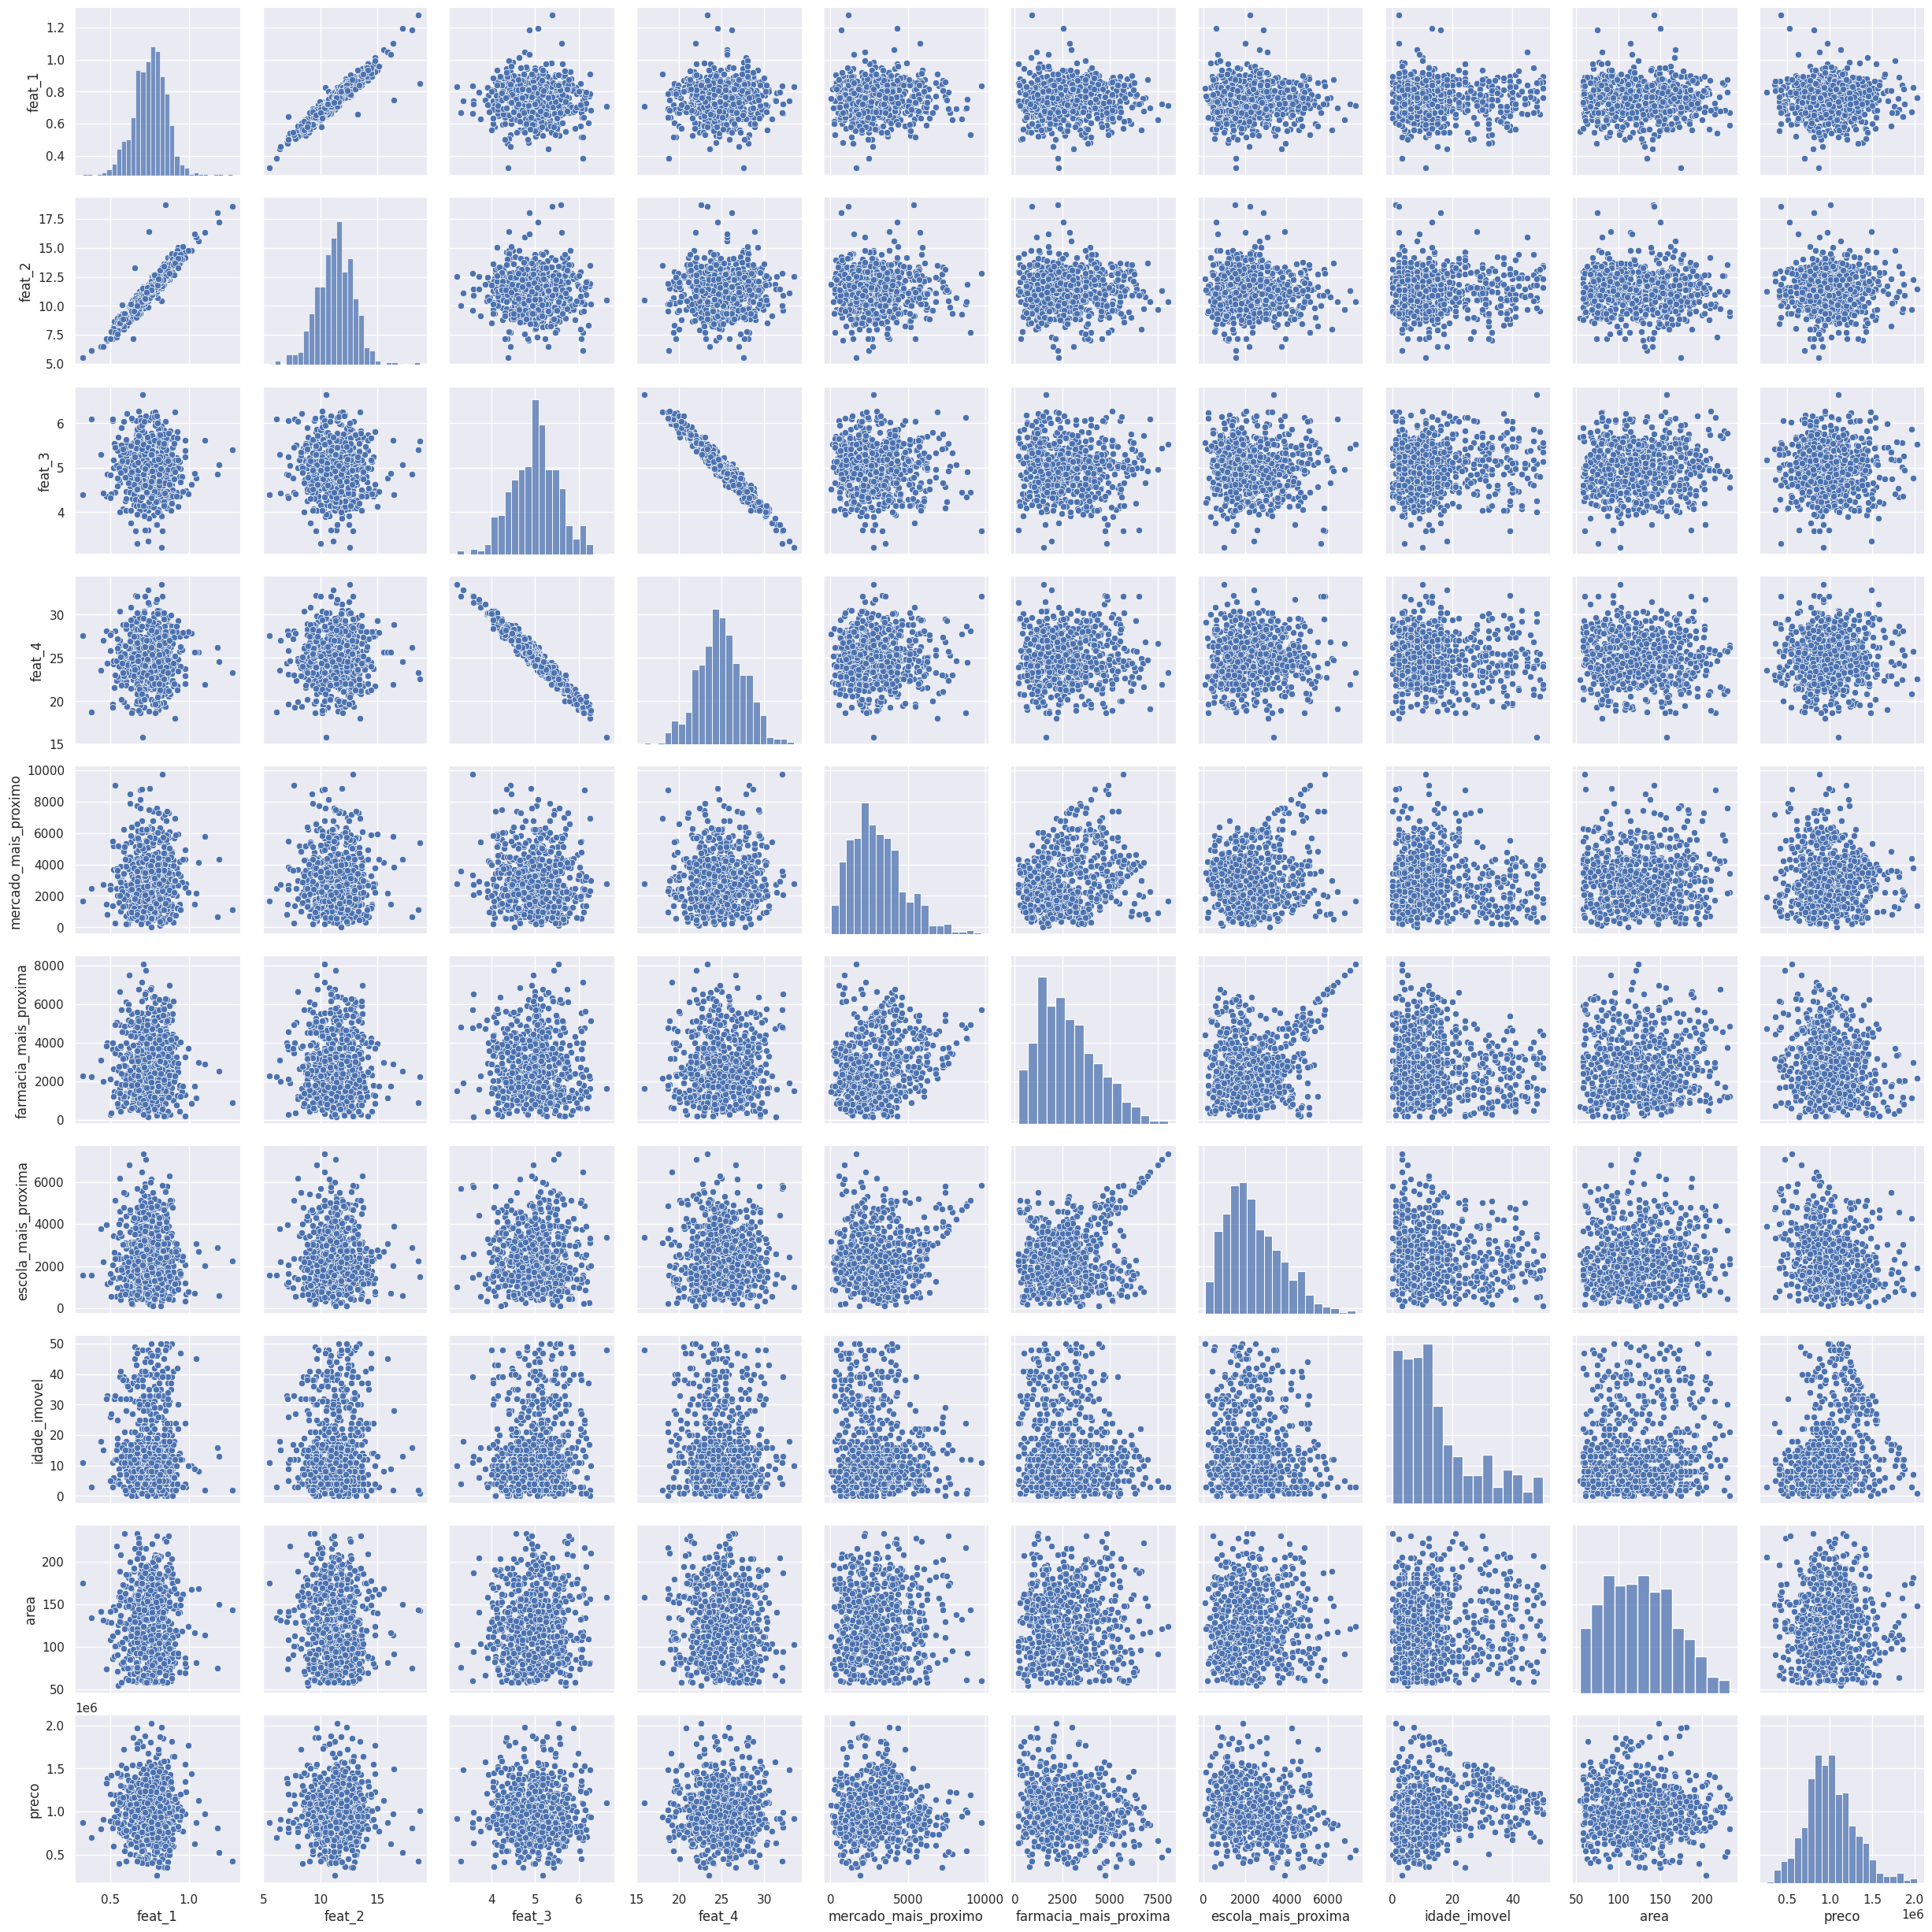

In [13]:
# A função .drop descarta algumas colunas do nosso DataFrame
sns.pairplot(
    dados.drop(columns=["loc_x", "loc_y", "num_penit_4km", "num_penit_500m"])
)

Utilizando a função `corr` do **Pandas**, junto com a visualização de mapa de calor do `heatmap` do `seaborn`, é possível criar um correlograma para mensurar, visualmente, as correlações entre as variáveis do conjunto de dados. Um adendo: a função `corr` admite apenas valores numéricos. Para contornar esse problema, podemos usar a função `select_dtypes` com o argumento `exclude="object"` para selecionar todas as colunas em que o tipo é diferente de `object`, ou seja, apenas as colunas que contém valores numéricos.

<Axes: >

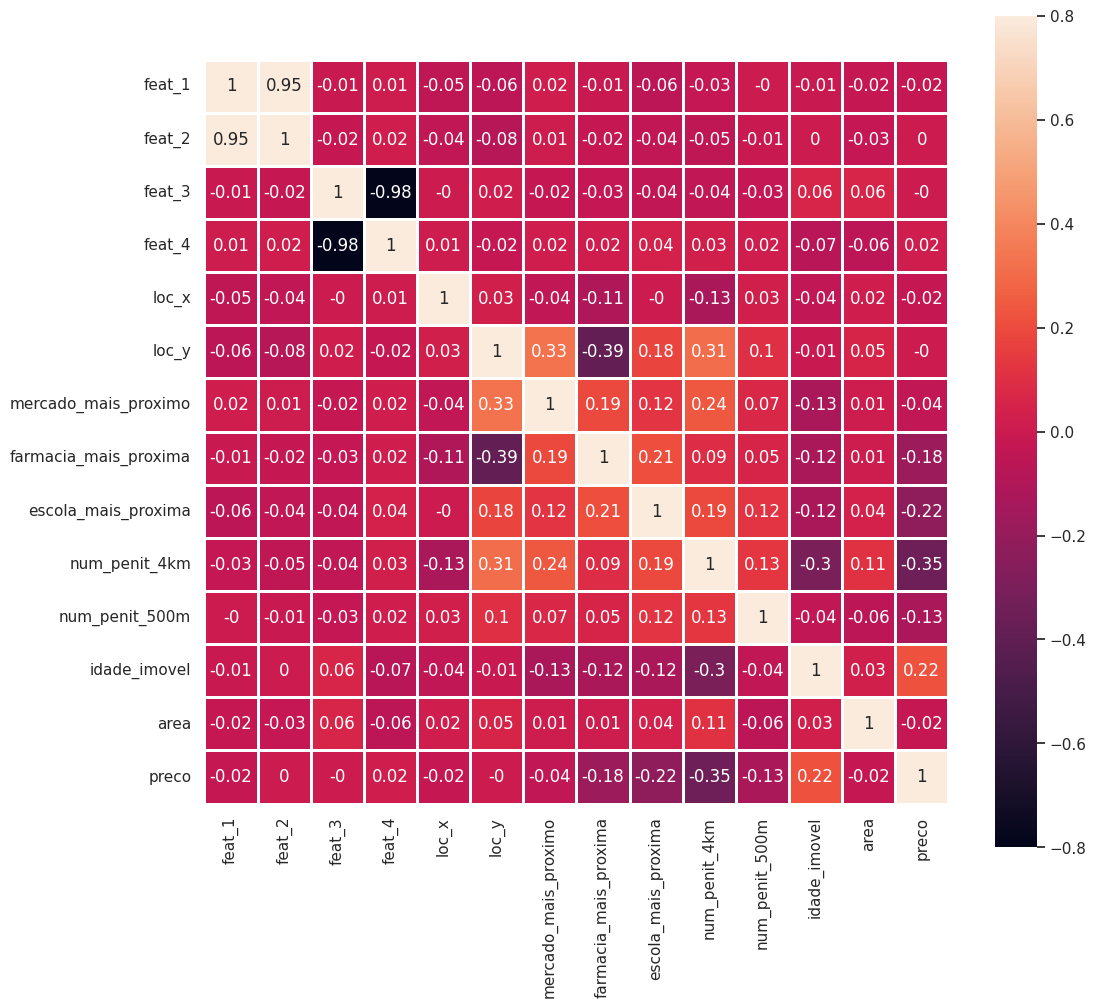

In [14]:
corr = dados.select_dtypes(exclude="object").corr().round(2)
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr, 
            annot=True,
            square=True, 
            vmax=.8,
            vmin=-.8,
            linewidths=2, 
            cbar_kws={"shrink": .9})

3 - Exercício
=============

O conjunto de arquivos de dados imobiliários contém erros sistemáticos, dados faltantes e outliers.

**Atividades**:

- Padronize as variáveis categóricas **tipo** e **cod_localidade**, remova as linhas com erros sistemáticos, e remove possíveis outliers (tipos ou localidades com frequência baixa);
- Para cada registro da base de dados, encontre a **regiao** por meio da coluna **uf** utilizando a base de estados do ibge disponibilizada para o exercício; 
- Realize a imputação de dados sobre as variáveis **feat_1**, **feat_2**, **feat_3** e **feat_4** utilizando regressão linear simples. Lembre-se que a partir da análise exploratória dos dados observa-se que **feat_1** tem correlação com **feat_2**, assim como **feat_3** tem correlação com **feat_4**, ou seja, precisamos encontrar duas equações:
  - $feat_1 = k_1 + c_1 feat_2$
  - $feat_3 = k_2 + c_2 feat_4$
- Remova os outliers dos pares de variáveis (**feat_1**, **feat_2**) e (**feat_3**, **feat_4**) utilizando o método z-score multidimensional;
- Identifique se existem outras variávies do conjunto com outliers, e, caso existam, remova os outliers citando a natureza da variável e o méteodo utilizado para identificação dos outliers;
- Após finalizar as atividades citadas anteriormente, remova todos os dados faltantes ainda presentes no conjunto de dados;
- Realize uma análise exploratória completa do conjunto de dados tratado;
- Salve o arquivo final em formato **parquet** com o nome *dados_tratados.parquet*;

**Informações adicionais**:

O prazo total para entrega do exercício é de 8 dias corridos, iniciando contagem a partir da data de disponibilização do exercício no Moodle;

A entrega deve ser feita no Moodle. Contudo, o exercício pode ser entregue em um arquivo comprimido **OU** via link compartilhado de um *fork* do projeto no github (ou alguma outra ferramenta de versionamento de código). Fica a critério do aluno escolher a melhor forma de entrega;

O arquivo (ou repositório git) da entrega, deve conter, obrigatóriamente:
- Uma cópia deste notebook (`exercicio.ipynb`) com a resolução das atividades;
- O arquivo `dados_tratados.parquet`, resultando do tratamento final da base de dados;